## Assignment 1

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.  
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_columns', 100,'display.max_rows',100)

In [4]:
#Read the Data
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1. Data Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Looking into the entries of the dataset, we can see that there are 1460 rows and 81 columns. Out of the 81 features - float64(3), int64(35), object(43). There are many fields with null values and several completely non null ones too. Hence, data cleaning and analysing each column is necessary.

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Let us look into each of 38 Numeric columns:
   -  ID : identifier, 1460 unique values
   - MSSubClass: Identifies the type of dwelling involved in the sale, no missing values, categorical numerals
   - LotFrontage: Linear feet of street connected to property, only 1201 values present
   - LotArea: Lot size in square feet, no missing value, continuous value
   - OverallQual: Rates the overall material and finish of the house, no missing values, category on ratings
   - OverallCond: Rates the overall condition of the house, no missing values, category on ratings
   - YearBuilt: Original construction date (YYYY)
   - YearRemodAdd: Remodel date (same as construction date if no remodeling or additions) (YYYY)
   - MasVnrArea: Masonry veneer area in square feet, continuous value, 1452 values present
   - BsmtFinSF1: Type 1 finished square feet, continuous value
   - BsmtFinSF2: Type 2 finished square feet, continuous value
   - BsmtUnfSF: Unfinished square feet of basement area, continuous value
   - TotalBsmtSF: Total square feet of basement area, continuous value
   - 1stFlrSF: First Floor square feet
   - 2ndFlrSF: Second floor square feet
   - LowQualFinSF: Low quality finished square feet (all floors)
   - GrLivArea: Above grade (ground) living area square feet
   - BsmtFullBath: Basement full bathrooms (count)
   - BsmtHalfBath: Basement half bathrooms (count)
   - FullBath: Full bathrooms above grade (count)
   - HalfBath: Half baths above grade (count)
   - Bedroom: Bedrooms above grade (does NOT include basement bedrooms) (count)
   - Kitchen: Kitchens above grade (count)
   - TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) (count)
   - Fireplaces: Number of fireplaces (count)
   - GarageYrBlt: Year garage was built (YYYY)
   - GarageCars: Size of garage in car capacity
   - GarageArea: Size of garage in square feet
   - WoodDeckSF: Wood deck area in square feet
   - OpenPorchSF: Open porch area in square feet
   - EnclosedPorch: Enclosed porch area in square feet
   - 3SsnPorch: Three season porch area in square feet
   - ScreenPorch: Screen porch area in square feet
   - PoolArea: Pool area in square feet
   - MiscVal: Value of miscellaneous feature (Price in $)
   - MoSold: Month Sold (MM)
   - YrSold: Year Sold (YYYY)
   - SalePrice: Selling Price of the house, our target variable
   
Much of the numeric variables have complete non null values. Some are categorical numbers such as ratings, some are year and months in numeric format, some are count of feature and some being areas in square-feet.

In [348]:
# Lets look at the categorical variables
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [349]:
#Lets look at the numerical variables
num_cols = data.select_dtypes(include=['float64','int64']).columns
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### 2. Data Cleaning and Exploration

In [5]:
# Lets check for null value percentages
round((data.isnull().sum()/len(data.index))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

Lets look at the features with very high null values first

- Alley            93.77
- PoolQC           99.52
- Fence            80.75
- MiscFeature      96.30

In [350]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [6]:
# NA 	 No alley access according to the data dictionary
#Lets map null values to "None"
data['Alley'].fillna("None", inplace = True)
data['Alley'].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

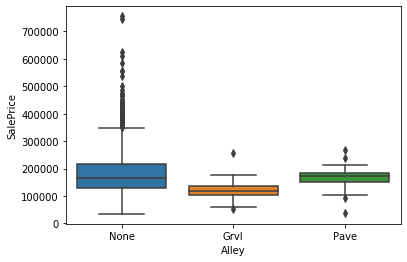

In [12]:
#Lets check if no access to alley has any impact on sale price
sns.boxplot(data.Alley,data.SalePrice)

As we can see, having no access to alley necessarily doesn't reduce the Sale price of the house. Although with access, paved alley has more preference than Gravel one.

In [7]:
# NA -> No pool
data['PoolQC'].fillna("None", inplace = True)
data['PoolQC'].value_counts()

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

In [8]:
# NA -> No fence
data['Fence'].fillna("None", inplace = True)
data['Fence'].value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [9]:
# NA -> No Miscellaneous Feature
data['MiscFeature'].fillna("None", inplace = True)
data['MiscFeature'].value_counts()

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

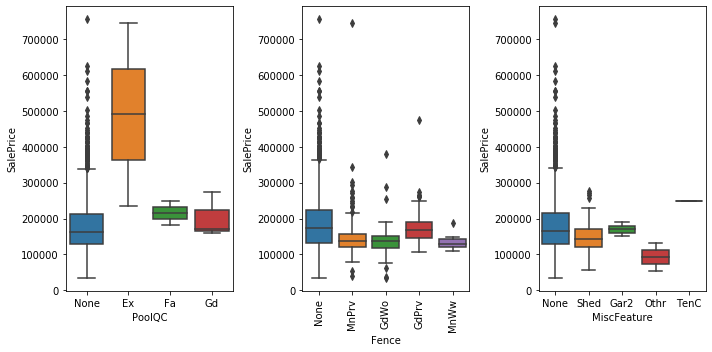

In [16]:
# Since these features are skewed to "None", lets look at its impact on salesprice
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(data.PoolQC,data.SalePrice)
plt.subplot(1,3,2)
sns.boxplot(data.Fence,data.SalePrice)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.boxplot(data.MiscFeature,data.SalePrice)
plt.tight_layout()
plt.show()

The common trend in these 3 features are that the non-availability of these doesn't impact the Sale price of house. Although in PoolQC, houses with excellent pool quality has generally more sale price.

In [12]:
# Lets check for null value percentages
round((data.isnull().sum()/len(data.index))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

We have few more columns with missing values, lets clean it too
- GarageQual        5.55
- GarageCond        5.55
- GarageType        5.55
- GarageYrBlt       5.55
- GarageFinish      5.55
- Electrical        0.07
- MasVnrType        0.55
- MasVnrArea        0.55
- BsmtQual          2.53
- BsmtCond          2.53
- BsmtExposure      2.60
- BsmtFinType1      2.53
- BsmtFinType2      2.60
- LotFrontage      17.74
- FireplaceQu      47.26

In [10]:
# NA	No Fireplace 
data['FireplaceQu'].fillna("None", inplace=True)
data['FireplaceQu'].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [11]:
data['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

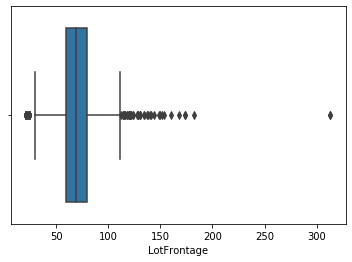

In [12]:
# LotFrontage is a continuous variable, so lets check for outlier first and decide on the imputation to be applied
sns.boxplot(data.LotFrontage)

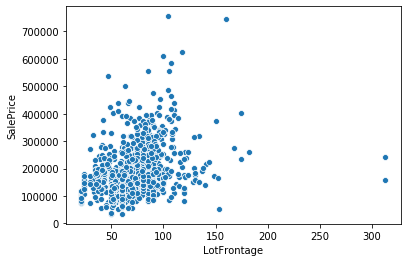

In [15]:
sns.scatterplot(data.LotFrontage, data.SalePrice)

The LotFrontage and SalePrice are clustered around an area with few outliers. Outlier impact is less on mean imputation.

In [13]:
# Most of the entries are around the mean, so lets impute with wan
m = round(data['LotFrontage'].mean(),1)
m

70.0

In [14]:
data['LotFrontage'].fillna(m, inplace = True)
data['LotFrontage'].isnull().sum()

0

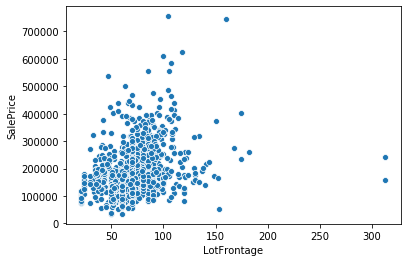

In [15]:
# Lets check if the general trend has changed wrt SalePrice
sns.scatterplot(data.LotFrontage, data.SalePrice)

In [16]:
# NA -> No Basement
data['BsmtFinType2'].fillna("None", inplace=True)
data['BsmtFinType2'].value_counts()

Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64

In [17]:
# NA -> No Basement
data['BsmtFinType1'].fillna("None", inplace=True)
data['BsmtFinType1'].value_counts()


Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [18]:
# NA -> no basement
data['BsmtQual'].fillna("None", inplace=True)
data['BsmtQual'].value_counts()

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64

In [19]:
# NA -> no basement
data['BsmtCond'].fillna("None", inplace=True)
data['BsmtCond'].value_counts()


TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64

In [20]:
# NA -> no basement
data['BsmtExposure'].fillna("None", inplace=True)
data['BsmtExposure'].value_counts()
 

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64

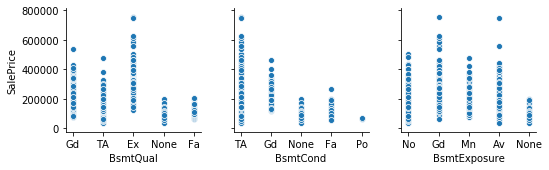

In [24]:
sns.pairplot(data, x_vars=['BsmtQual','BsmtCond','BsmtExposure'],y_vars='SalePrice', kind='scatter')

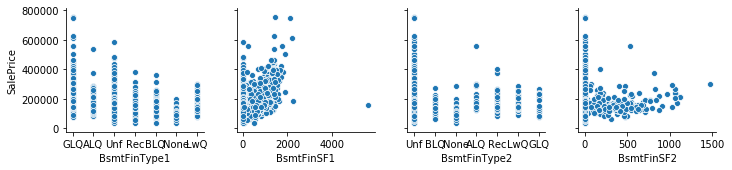

In [31]:
sns.pairplot(data, x_vars=['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2'], y_vars='SalePrice')

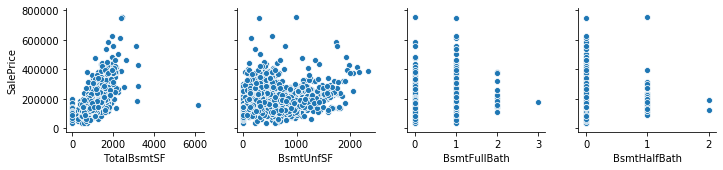

In [34]:
sns.pairplot(data, x_vars=['TotalBsmtSF','BsmtUnfSF','BsmtFullBath','BsmtHalfBath'], y_vars='SalePrice')

- unfinished basement areas are marked as 0
- With an increase in finished basement area, SalePrice grows almost linearly, with few outliers for very huge basements
- The above inference is only for basement type1, for type 2, the sale price remains around a constant low region
- As the total basement area increases, Sale price is increasing linearly
- Unfinished Basements doesn't earn much benefit in terms of Sale Price
- Basments tend to have 0/1 full bathroom and mostly 0 half bathrooms

In [25]:
# Missing values in MasVnrType and MasVnrArea are 0.55
#Lets visualize and see if they are at same indices
data.loc[data['MasVnrArea'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,70.0,7851,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,None,None,None,0,5,2010,WD,Normal,216500
529,530,20,RL,70.0,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,None,None,None,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,None,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,None,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,None,None,None,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,None,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,None,None,None,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,None,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,None,None,None,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,None,None,None,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,None,None,None,0,3,2008,WD,Normal,237000


In [36]:
data.loc[data['MasVnrType'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,70.0,7851,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,None,None,None,0,5,2010,WD,Normal,216500
529,530,20,RL,70.0,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,None,None,None,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,None,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,None,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,None,None,None,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,None,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,None,None,None,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,None,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,None,None,None,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,None,None,None,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,None,None,None,0,3,2008,WD,Normal,237000


In [26]:
data[['MasVnrType','MasVnrArea']].loc[data['MasVnrType']=='None']

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
...,...,...
1454,None,0.0
1455,None,0.0
1457,None,0.0
1458,None,0.0


The indices for missing MasVnrType and area are same. We can conclude that entries where Masonry veneer type = none, there its area is null/0. So MasVnrArea can be imputed with 0. 

In [21]:
data['MasVnrType'].fillna("None", inplace=True)
data['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [22]:
# As we can see, the value of MasVnrArea where Type = None is 0
# Lets go ahead and impute missing values with 0
data['MasVnrArea'].fillna(0.0, inplace = True)
data['MasVnrArea'].isnull().sum()

0

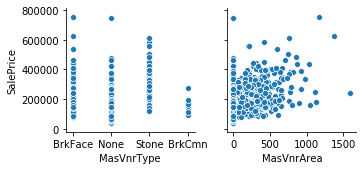

In [40]:
sns.pairplot(data, x_vars=['MasVnrType','MasVnrArea'], y_vars='SalePrice')

- Brick Face and Stone masonry veneer earns more value
- Increase in Masonary Area, has good impact on SalePrice
- Said so, MasVnrArea =0 also has similar prices

In [23]:
# Electrical has only 0.07% missing values
# As per data dictionary there are no meaning for null values. Obviously all houses will have some kind of electrical system.
# So lets drop these rows having null values
data=data.loc[data.Electrical.isnull()==False]
len(data.index)

1459

For Garage Quality, Condition, type and Finish : NA -> No Garage available, therefore the corresponding Garage year built will be null. Lets impute year to 0 and categories to none

In [24]:
data['GarageQual'].fillna("None", inplace = True)
data['GarageQual'].value_counts()

TA      1310
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64

In [25]:
data['GarageCond'].fillna("None", inplace = True)
data['GarageCond'].value_counts()

TA      1325
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

In [26]:
data['GarageType'].fillna("None", inplace = True)
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     87
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [27]:
data['GarageFinish'].fillna("None", inplace = True)
data['GarageFinish'].value_counts()

Unf     605
RFn     422
Fin     351
None     81
Name: GarageFinish, dtype: int64

In [28]:
data['GarageYrBlt'].fillna(0.0, inplace = True)
data['GarageYrBlt'].isnull().sum()

0

In [29]:
# Since all year fields are in integer format lets convert GarageYrBlt to int
data['GarageYrBlt']=data['GarageYrBlt'].astype(int)

<Figure size 432x288 with 0 Axes>

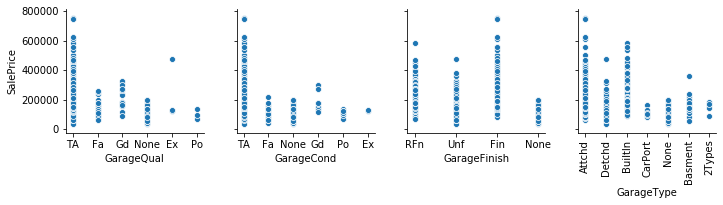

In [50]:
fig=plt.figure()
sns.pairplot(data, x_vars=['GarageQual','GarageCond','GarageFinish','GarageType'], y_vars='SalePrice')
plt.xticks(rotation=90)
plt.show()

 - Most Houses have Typical Average, Finished and Attached Garages
 - Built in and Attached Garages are of similar values and interests

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non

In [373]:
round((data.isnull().sum()/len(data.index))*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

We have cleaned the data of missing values. <br>
#### Outlier Treatment

Lets check which all numeric variables has outlier

In [53]:
# Checking outliers at 25%,50%,75%,90%,95% and above
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,70.039068,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.187800,443.943797,46.581220,567.366004,1057.891021,1162.906785,346.791638,5.848526,1515.546950,0.425634,0.057574,1.564770,0.382454,2.866347,1.046607,6.517478,0.613434,1868.644962,1.766964,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,421.411181,42.310746,22.031446,9984.666267,1.383171,1.113079,30.199555,20.644343,180.773158,456.106417,161.369977,441.992392,438.500975,386.572089,436.610637,48.639512,525.650927,0.518969,0.238830,0.550987,0.502798,0.816050,0.220410,1.625902,0.644687,453.838403,0.747546,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,70.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,479.000000,992.000000,1088.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.500000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1313.200000,120.000000,92.000000,14388.400000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1066.000000,117.400000,1232.000000,1602.400000,1680.000000,954.400000,0.000000,2158.600000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.200000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.100000,160.000000,104.000000,17402.300000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.400000,1468.000000,1753.000000,1831.500000,1141.100000,0.000000,2466.200000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.200000,335.000000,175.100000,180.300000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326200.000000
99%,144

Checking the percentile lists, we could see that there are few features whose 95% and 99% has a considerable jump. Lets consider these fields for outlier treatment.<br>
The fields include:
1. LotArea
2. MasVnrArea
3. BsmtFinSF2
4. TotalBsmtSF
5. GrLivArea
6. WoodDeckSF
7. 1stFlrSF
8. OpenPorchSF

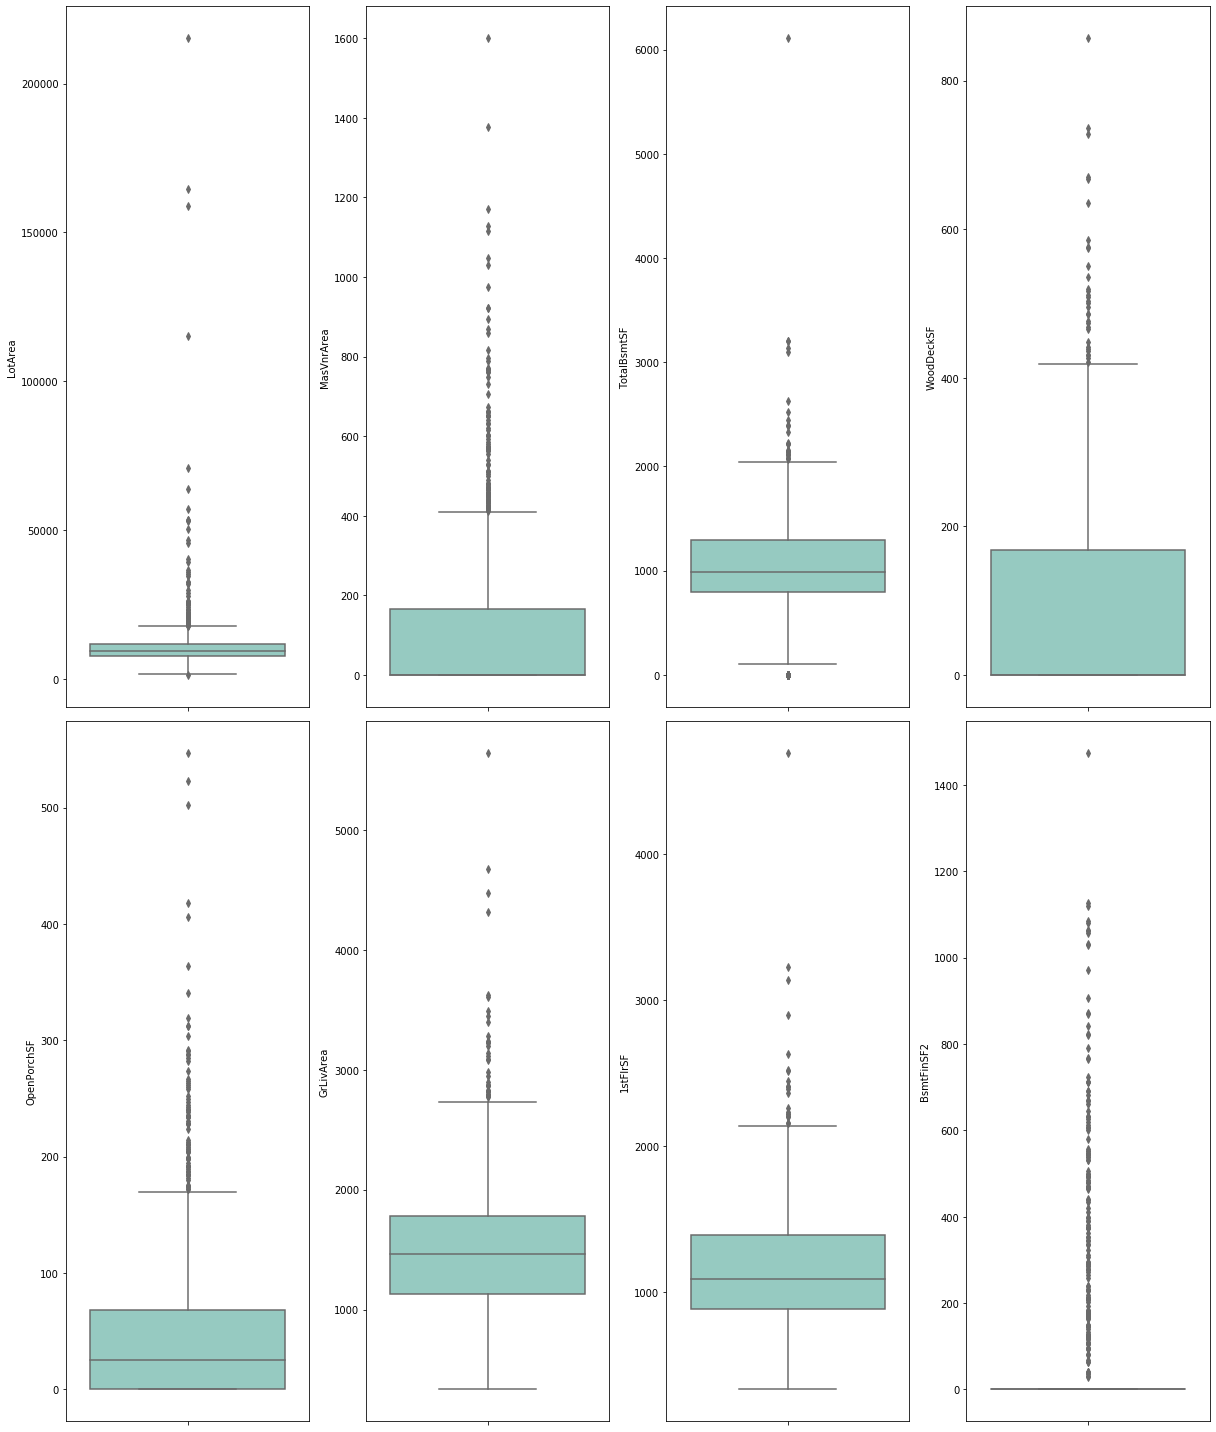

In [56]:
# Visualize the outliers

plt.figure(figsize=(17, 20))
plt.subplot(2,4,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = data)
plt.subplot(2,4,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = data)
plt.subplot(2,4,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = data)
plt.subplot(2,4,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = data)
plt.subplot(2,4,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = data)
plt.subplot(2,4,6)
sns.boxplot(y = 'GrLivArea', palette='Set3', data = data)
plt.subplot(2,4,7)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = data)
plt.subplot(2,4,8)
sns.boxplot(y = 'BsmtFinSF2', palette='Set3', data = data)
plt.tight_layout()
plt.show()

In [30]:
# Removing Outliers

# Removing values beyond 98% LotArea

q = data['LotArea'].quantile(0.98)
data = data[data['LotArea'] < q]

# Removing values beyond 98% for MasVnrArea

q = data['MasVnrArea'].quantile(0.98)
data = data[data['MasVnrArea'] < q]

# Removing values beyond 99% for TotalBsmtSF

q = data['TotalBsmtSF'].quantile(0.99)
data = data[data['TotalBsmtSF'] < q]

# Removing values beyond 99% for WoodDeckSF

q = data['WoodDeckSF'].quantile(0.99)
data = data[data['WoodDeckSF'] < q]

# Removing values beyond 98% for 1stFlrSF

q = data['1stFlrSF'].quantile(0.98)
data = data[data['1stFlrSF'] < q]

# Removing values beyond 99% for OpenPorchSF

q = data['OpenPorchSF'].quantile(0.99)
data = data[data['OpenPorchSF'] < q]

# Removing values beyond 99% for GrLivArea

q = data['GrLivArea'].quantile(0.99)
data = data[data['GrLivArea'] < q]


# not handling BsmtFinSF2, since its mostly outliers

# Percentage data retained

retain = (len(data.index)/1459)*100

In [31]:
retain

90.19876627827279

90% of the orginal data is retained. Lets go ahead and make few more changes

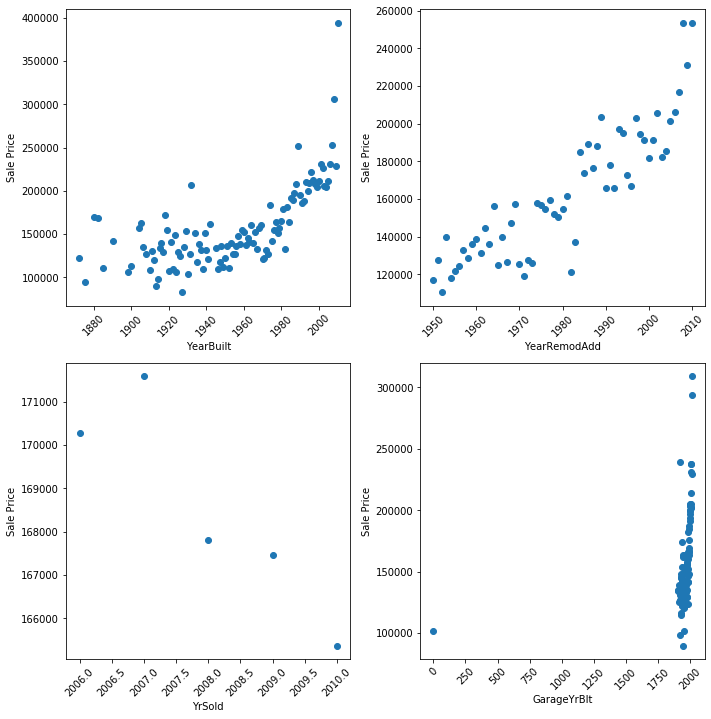

In [32]:
# Lets visualize the year feature
y_feat = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
i=1
plt.figure(figsize=(10,10))
for y in y_feat:
    y_df = pd.DataFrame(data[[y,'SalePrice']].groupby(y).mean())
    plt.subplot(2,2,i)
    plt.scatter(y_df.index,y_df.SalePrice)
    plt.xlabel(y)
    plt.ylabel('Sale Price')
    plt.xticks(rotation=45)
    i=i+1

plt.tight_layout()
plt.show()
    


- The dataset contains house sold on years 2006 - 2010. 
- Highest house sale price were during the year 2007 and least during 2008 and 2010
- Garages were built around year 2000 mostly
- General trend shows that, remodelling the house increase SalePrice
- Houses built after 2000 has generally more values, but there are few outliers on houses built during early 1900

In [33]:
# MSSubClass is a categorical variables, so lets convert it to string
data['MSSubClass']=data['MSSubClass'].astype(str)

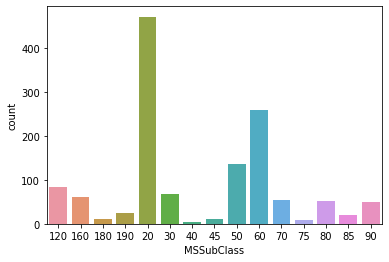

In [377]:
sns.countplot(data['MSSubClass'])

Dwelling involved in sales are mostly in subclass 20 which means 1-STORY 1946 & NEWER ALL STYLES

In [34]:
# label encode ordinal features where there is order in categories

data = data.replace({  "Alley":        {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"None" : 0, "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4},
                       "BsmtFinType1": {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Fence":        {"None" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, "GdPrv" : 4},
                       "FireplaceQu":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond":   {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1458
Data columns (total 81 columns):
Id               1316 non-null int64
MSSubClass       1316 non-null object
MSZoning         1316 non-null object
LotFrontage      1316 non-null float64
LotArea          1316 non-null int64
Street           1316 non-null int64
Alley            1316 non-null int64
LotShape         1316 non-null int64
LandContour      1316 non-null int64
Utilities        1316 non-null int64
LotConfig        1316 non-null object
LandSlope        1316 non-null int64
Neighborhood     1316 non-null object
Condition1       1316 non-null object
Condition2       1316 non-null object
BldgType         1316 non-null object
HouseStyle       1316 non-null object
OverallQual      1316 non-null int64
OverallCond      1316 non-null int64
YearBuilt        1316 non-null int64
YearRemodAdd     1316 non-null int64
RoofStyle        1316 non-null object
RoofMatl         1316 non-null object
Exterior1st      1316 non-null

In [35]:
#After labelling encoding, there are few features still in object type, lets investigate it further
data.BsmtCond.value_counts()

3    1180
4      55
2      43
0      36
1       2
Name: BsmtCond, dtype: int64

In [36]:
data.BsmtCond = data.BsmtCond.astype(int)

In [37]:
data.PoolQC.value_counts()

0    1314
3       1
1       1
Name: PoolQC, dtype: int64

In [38]:
# These fields were not fully replaced, hence hasn't changed the dtype to int
data.PoolQC = data.PoolQC.astype(int)

In [39]:
#changing months to categorical
import calendar

data['MonthSold'] = data['MoSold'].apply(lambda x: calendar.month_name[x])
data = data.drop(['MoSold'], axis=1)
data['MonthSold'].value_counts()

June         227
July         208
May          188
April        132
August       110
March         90
October       77
November      73
September     57
December      56
January       49
February      49
Name: MonthSold, dtype: int64

Most houses are sold during June and July when its start of winter in Australia. Least houses are sold during January and February, when its summer.

In [40]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getAge(df):
    if(df['YearBuilt'] == df['YearRemodAdd']):
        # If there haven't been any remodification, built year = remod year
        # Calculating built age
        return df['YrSold'] - df['YearBuilt']
    else:
        # Calculating remod age
        return df['YrSold'] - df['YearRemodAdd']
       
data['BuiltOrRemodelAge'] = data.apply(getAge, axis=1)
data['BuiltOrRemodelAge'].head()

0     5
1    31
2     6
3    36
4     8
Name: BuiltOrRemodelAge, dtype: int64

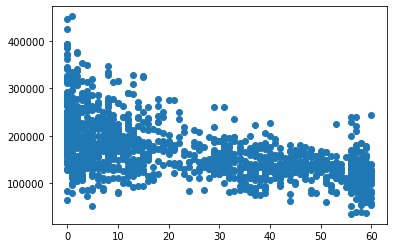

In [41]:
plt.scatter(data['BuiltOrRemodelAge'],data['SalePrice'])

As the age of house during selling increases, sale price reduce as shown in the graph

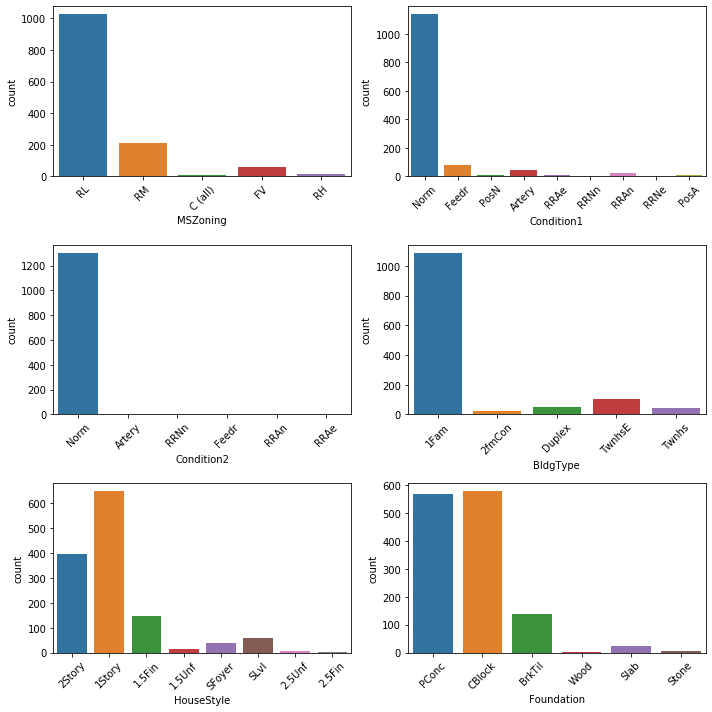

In [387]:
# Lets check out plots of few categorical features
fig = plt.figure(figsize=(10,10))
p_cols = ['MSZoning','Condition1','Condition2','BldgType', 'HouseStyle', 'Foundation']
i=1
for p in p_cols:
    plt.subplot(3,2,i)
    sns.countplot(data[p])
    plt.xlabel(p)
    plt.xticks(rotation=45)
    i=i+1
    
plt.tight_layout()
plt.show()

Majority of the houses come under the category:
- MSZoning :  RL	Residential Low Density
- Condition1,2 :  Norm	Normal
- BldgType : 1Fam	Single-family Detached
- HouseStyle : 1Story	One story
- Foundation : CBlock	Cinder Block and PConc	Poured Contrete

Lets look at few more categorical variables and their impact on Sale Price

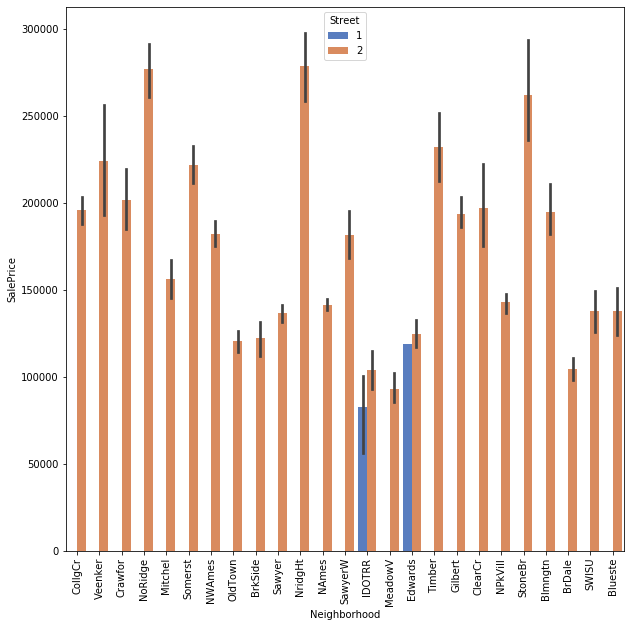

In [388]:
fig=plt.figure(figsize=(10,10))
sns.barplot(x="Neighborhood", y="SalePrice", hue="Street", data=data, palette="muted")
plt.xticks(rotation=90)
plt.show()

Interestingly, Gravel Streets were present only in IDOTRR and Edwards. Houses having high value were mainly in NoRidge, NridgHt and StonerBr. Least values houses ere in IDOTR, MeadowV and BrDale, among which gravelled street reduced the value of houses in IDOTR even more.

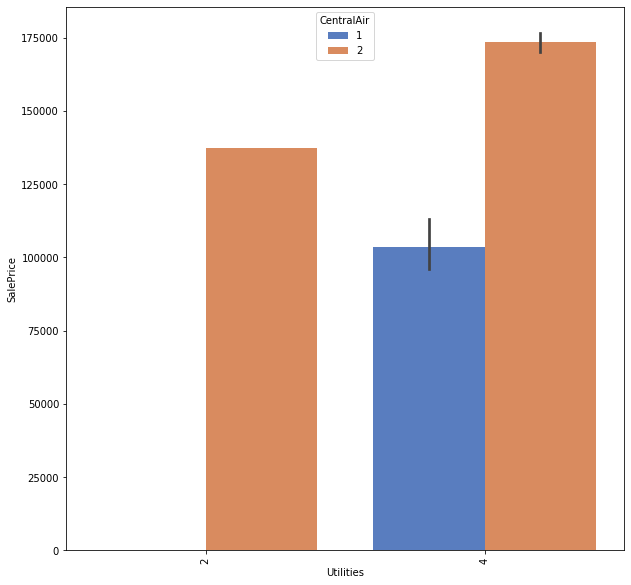

In [389]:
fig=plt.figure(figsize=(10,10))
sns.barplot(x="Utilities", y="SalePrice", hue="CentralAir", data=data, palette="muted")
plt.xticks(rotation=90)
plt.show()

The houses in the dataset were of kind having utilities either in AllPub	All public Utilities (E,G,W,& S) or NoSewa	Electricity and Gas category. Most of which were in AllPub. Houses in AllPub category which had CentralAir conditioning had more sales value then which didnt.

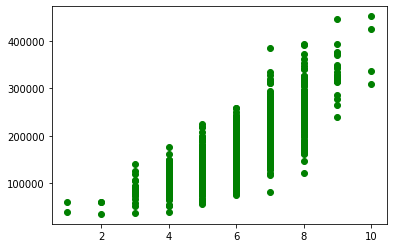

In [390]:
plt.scatter(data['OverallQual'],data['SalePrice'],c="g")

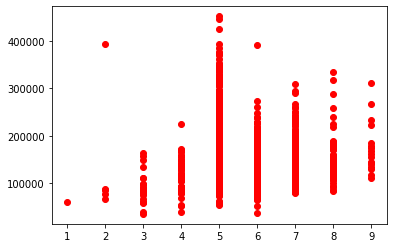

In [391]:
plt.scatter(data['OverallCond'],data['SalePrice'],c="r")

- As expected, with increase in Overall Quality of the house the sales value increases
- An expectional trend is that the houses in an average condition were having more sales value than the excellent ones
- More houses of average condition are sold than excellent ones

In [42]:
# Lets drop Id field, since its same as index
data= data.drop('Id', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1458
Data columns (total 81 columns):
MSSubClass           1316 non-null object
MSZoning             1316 non-null object
LotFrontage          1316 non-null float64
LotArea              1316 non-null int64
Street               1316 non-null int64
Alley                1316 non-null int64
LotShape             1316 non-null int64
LandContour          1316 non-null int64
Utilities            1316 non-null int64
LotConfig            1316 non-null object
LandSlope            1316 non-null int64
Neighborhood         1316 non-null object
Condition1           1316 non-null object
Condition2           1316 non-null object
BldgType             1316 non-null object
HouseStyle           1316 non-null object
OverallQual          1316 non-null int64
OverallCond          1316 non-null int64
YearBuilt            1316 non-null int64
YearRemodAdd         1316 non-null int64
RoofStyle            1316 non-null object
RoofMatl             

In [43]:
# Creating a copy of data frame
house = data

In [44]:
# Let us also derive the age of Garage built during selling
house['Garage_Age'] = house['YrSold'] - house['GarageYrBlt']
house = house.drop('GarageYrBlt',axis=1)
house.Garage_Age.describe()

count    1316.000000
mean      145.660334
std       465.041045
min         0.000000
25%         7.000000
50%        31.000000
75%        51.000000
max      2010.000000
Name: Garage_Age, dtype: float64

In [45]:
house=house.drop(['YrSold','YearBuilt','YearRemodAdd'],axis=1)

In [396]:
# Now, lets look at the correlation between features

cr = house.corr()
cr

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,BuiltOrRemodelAge,Garage_Age
LotFrontage,1.000000,0.568087,-0.074983,-0.190223,-0.164151,-0.060451,-0.002394,-0.054555,0.158186,-0.047835,0.140214,0.107222,-0.029553,0.098698,0.035466,0.063303,0.034430,0.093790,0.006606,0.022427,0.124301,0.258581,0.065754,0.062716,0.322371,0.041060,-0.022813,0.274521,0.021104,-0.010330,0.138179,0.039487,0.255146,0.014999,0.086735,0.278738,0.018064,0.188618,0.184280,0.193038,0.253837,0.287734,0.111001,0.107011,0.086749,0.066515,0.123787,-0.005791,0.081022,0.050894,0.017792,0.014916,0.048976,0.008318,0.307856,-0.044236,-0.103801
LotArea,0.568087,1.000000,-0.038353,-0.152439,-0.321318,-0.135241,-0.039565,-0.095478,0.134201,-0.018850,0.081209,0.063445,0.028321,0.069650,0.013935,0.099571,0.013256,0.135776,0.022168,0.051495,0.067574,0.250943,0.050707,0.077251,0.347933,0.103006,-0.040567,0.351185,0.058139,0.042635,0.149407,0.096989,0.280441,0.002525,0.072218,0.336930,-0.014760,0.281951,0.253863,0.167933,0.240646,0.280197,0.145505,0.135312,0.033460,0.122484,0.115997,-0.002042,0.078703,0.079987,0.007915,0.006374,-0.007547,0.063359,0.343264,-0.023745,-0.140864
Street,-0.074983,-0.038353,1.000000,0.013664,0.011613,0.107313,-0.001523,0.106742,0.052368,0.041450,0.023040,0.113938,-0.027115,-0.003874,-0.007406,-0.060565,0.025624,0.024491,-0.064294,-0.050043,0.025119,0.035850,0.064914,0.095741,0.037319,0.044189,0.006151,0.070599,-0.010271,0.013303,0.054565,0.040553,0.040589,0.011805,0.062436,0.050048,-0.012701,0.050226,0.052016,0.041787,-0.003230,-0.031284,0.040898,0.040841,0.038431,0.029052,0.027682,0.020528,0.006421,0.014733,0.002150,0.001926,0.026122,-0.011647,0.069739,-0.056403,-0.045829
Alley,-0.190223,-0.152439,0.013664,1.000000,0.071101,-0.011788,0.006824,0.007289,-0.008910,0.037796,-0.086044,-0.008688,-0.014783,-0.045842,0.004549,-0.071661,-0.137940,-0.138038,-0.051669,-0.051850,0.056441,-0.108743,0.015290,-0.161120,-0.119901,0.102571,0.032599,0.013687,-0.081084,-0.034235,-0.002995,-0.003521,-0.023540,0.010504,0.012746,-0.043905,-0.009202,-0.111542,-0.093482,-0.103782,-0.023168,-0.036256,-0.022202,-0.038670,-0.180280,-0.106655,0.099878,0.169612,-0.028778,-0.048621,-0.009638,-0.008634,-0.009166,-0.014304,-0.088177,-0.011646,0.012878
LotShape,-0.164151,-0.321318,0.011613,0.071101,1.000000,0.146831,0.030420,0.063354,-0.171309,0.058509,-0.032775,-0.176131,-0.010210,-0.205248,-0.098724,-0.143724,-0.100174,-0.105071,-0.036345,-0.028910,-0.016601,-0.147982,-0.122935,-0.090360,-0.131681,-0.067805,0.026735,-0.159519,-0.035281,-0.050671,-0.164231,-0.116530,-0.056843,0.091377,-0.136751,-0.093445,-0.034823,-0.163378,-0.168128,-0.225101,-0.183084,-0.155199,-0.099134,-0.097156,-0.104683,-0.136984,-0.095305,0.094677,-0.029289,-0.056620,0.026581,0.023812,0.051071,-0.030241,-0.246743,0.175315,0.088417
LandContour,-0.060451,-0.135241,0.107313,-0.011788,0.146831,1.000000,-0.007972,0.550148,0.003341,0.005453,0.049876,0.044577,0.037533,-0.002268,0.040281,-0.182853,-0.005277,-0.083971,0.047129,0.031795,0.049296,-0.022502,0.045946,0.047578,-0.033929,0.013479,-0.009181,-0.012911,-0.055104,-0.003958,0.052221,0.003625,0.049249,-0.029113,0.016132,0.022462,-0.007504,-0.049907,-0.063424,0.018584,-0.013646,-0.025030,0.032173,0.041328,0.062632,-0.041441,0.048960,-0.018582,-0.068720,-0.020710,0.011259,0.010086,0.048768,0.018076,-0.050945,-0.029254,-0.044043
Utilities,-0.002394,-0.039565,-0.001523,0.006824,0.030420,-0.007972,1.000000,-0.005645,-0.000585,-0

<Figure size 1440x1440 with 0 Axes>

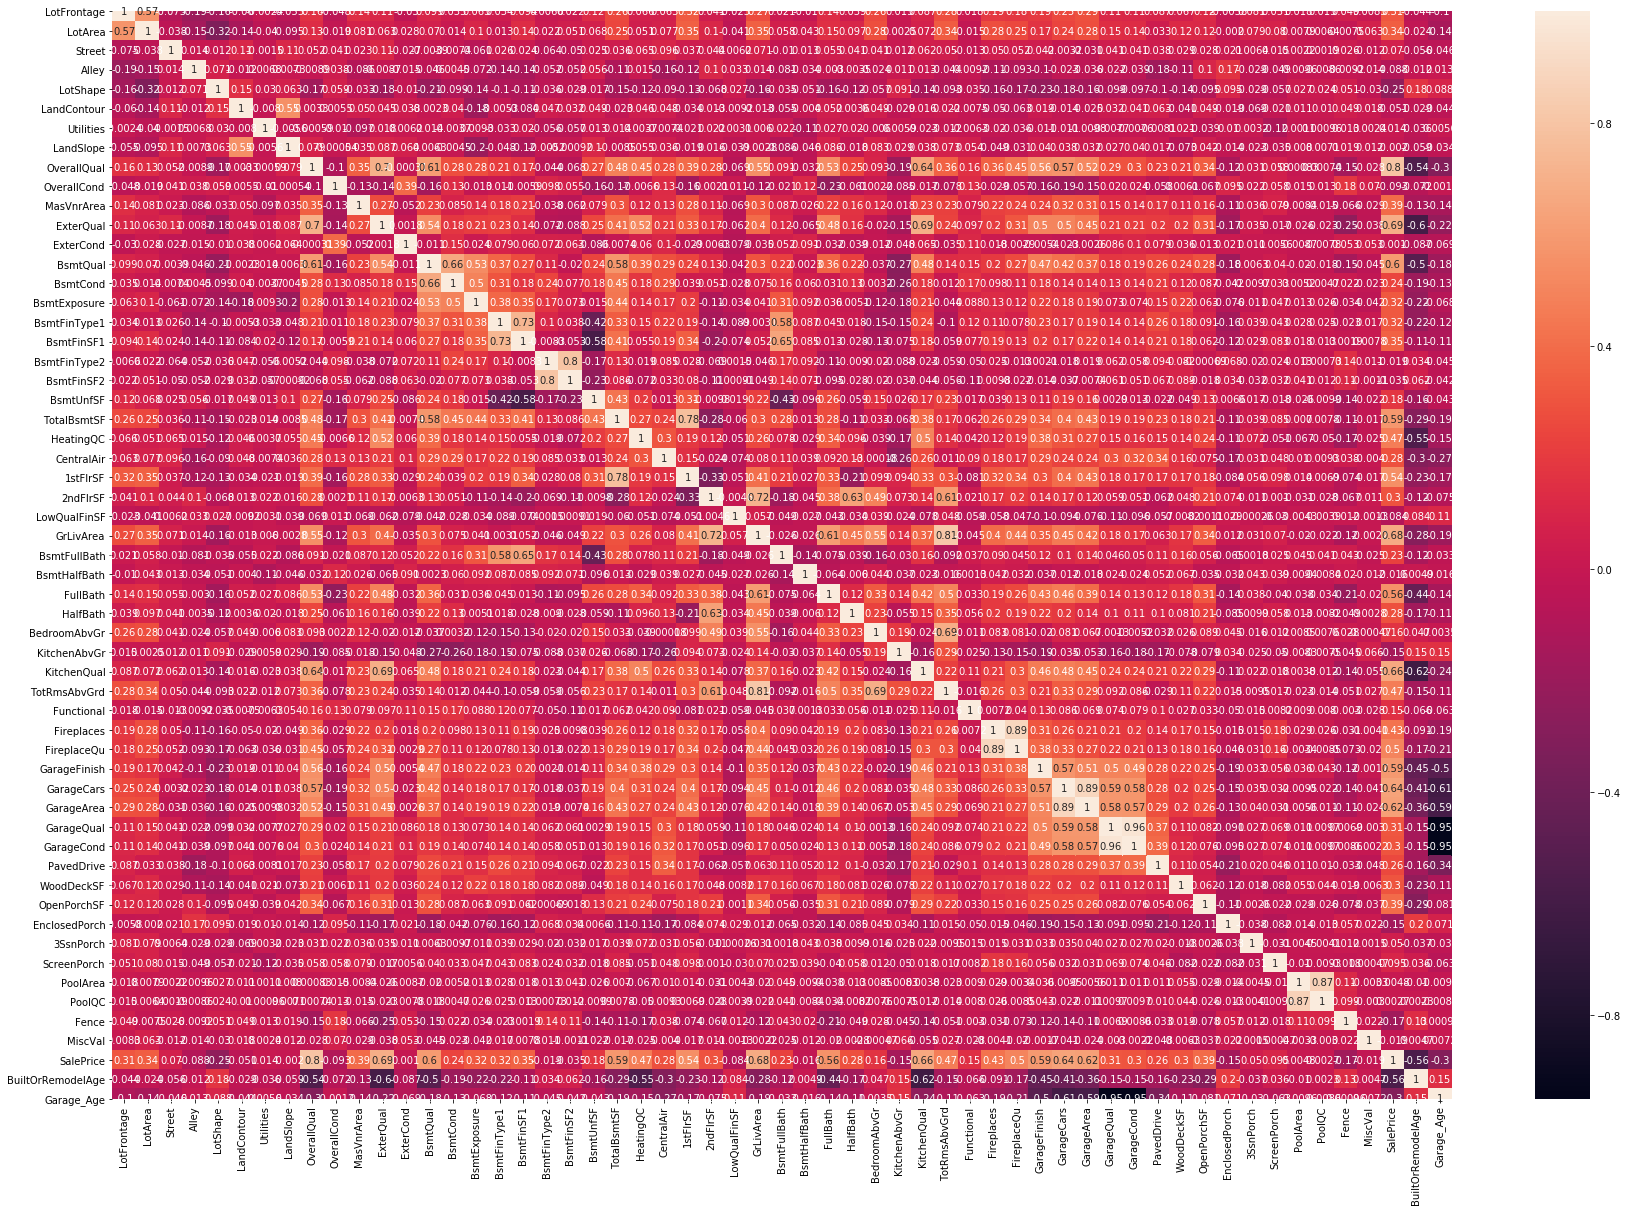

In [397]:
fig = plt.figure(figsize=(30,20))
sns.heatmap(cr,annot=True)
plt.show()

High Positive Correlation is shown between:
1. SalePrice and OverallQual
2. TotalBsmtSF and 1stFlrSF
3. GatageArea and GarageCars
4. GrLivArea and TotRmsAbvGrd
5. BSFinType1 and BSFinSF1
6. BSFinType2 and BSFinSF2
7. Fireplace and FireplaceQC
8. Poolarea and PoolQC
9. GarageQual and GarageCond

- SalePrice has a notable negative correlation with builtorRemodAge

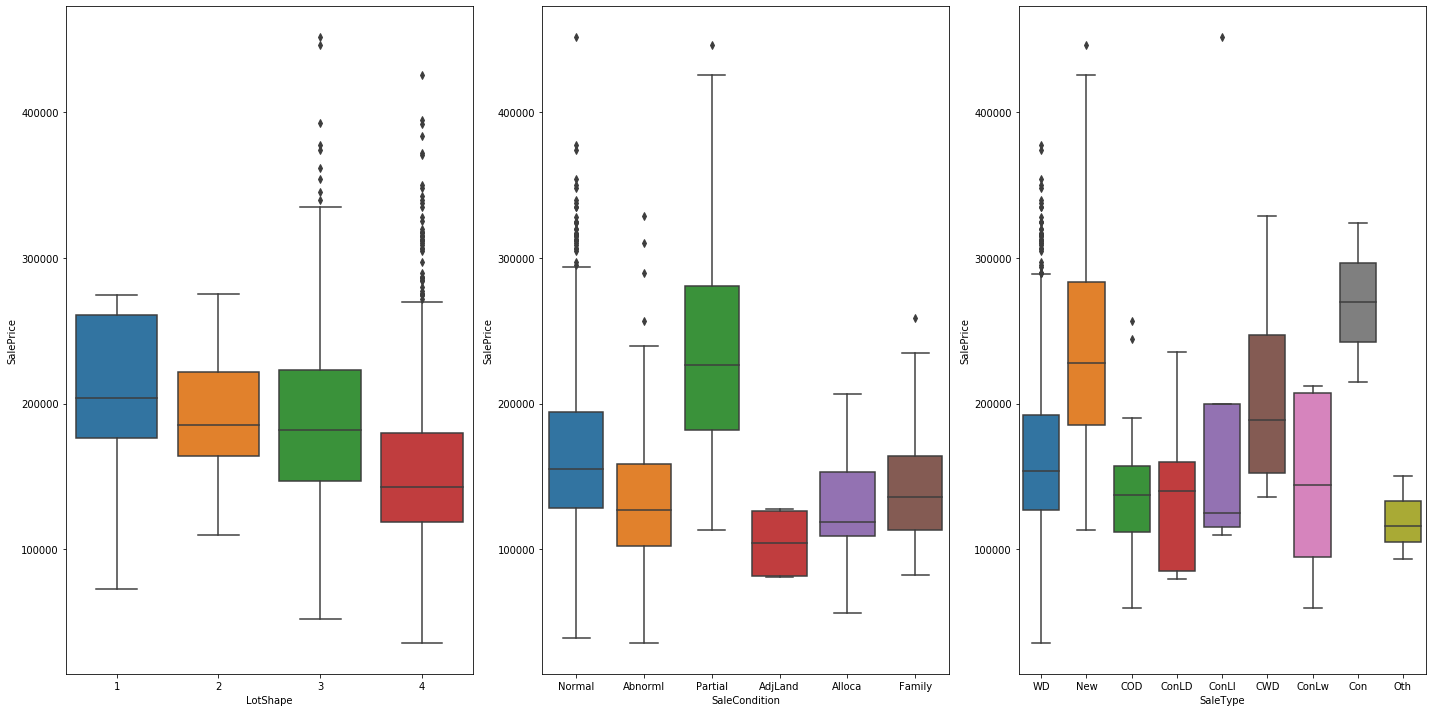

In [404]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(data.LotShape,data.SalePrice)
plt.subplot(1,3,2)
sns.boxplot(data.SaleCondition,data.SalePrice)
plt.subplot(1,3,3)
sns.boxplot(data.SaleType,data.SalePrice)
plt.tight_layout()
plt.show()

- Most houses were sold at Sale Condition : Partial, which are new homes
- Regular shaped Lots are preferred over others
- Dataset contains generally new homes, sold at good prices
- There is also a small set on house with sale type : Con ( Contract 15% down payment ) which has good SalePrice as well

In [46]:
# Map CentralAir to 1/0 and making it as integer column
house['CentralAir'] = house['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1458
Data columns (total 78 columns):
MSSubClass           1316 non-null object
MSZoning             1316 non-null object
LotFrontage          1316 non-null float64
LotArea              1316 non-null int64
Street               1316 non-null int64
Alley                1316 non-null int64
LotShape             1316 non-null int64
LandContour          1316 non-null int64
Utilities            1316 non-null int64
LotConfig            1316 non-null object
LandSlope            1316 non-null int64
Neighborhood         1316 non-null object
Condition1           1316 non-null object
Condition2           1316 non-null object
BldgType             1316 non-null object
HouseStyle           1316 non-null object
OverallQual          1316 non-null int64
OverallCond          1316 non-null int64
RoofStyle            1316 non-null object
RoofMatl             1316 non-null object
Exterior1st          1316 non-null object
Exterior2nd        


### 3. Data Preparation

- Dummy Variable Creation

In [47]:
cat_cols = house.select_dtypes(include=['object']).columns
len(cat_cols)

21

In [48]:
dummy_df = pd.get_dummies(house[cat_cols],drop_first=True)
dummy_df = dummy_df.reset_index()
dummy_df

,index,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MonthSold_August,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,1453,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1312,1454,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1313,1455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1314,1457,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [49]:
X = house.drop(cat_cols, axis=1)
X = X.reset_index()
X

,index,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,BuiltOrRemodelAge,Garage_Age
0,0,65.0,8450,2,0,4,4,4,3,7,5,196.0,4,3,4,3,2,6,706,1,0,150,856,5,0,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,208500,5,5
1,1,80.0,9600,2,0,4,4,4,3,6,8,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,0,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,2,2,460,3,3,2,298,0,0,0,0,0,0,0,0,181500,31,31
2,2,68.0,11250,2,0,3,4,4,3,7,5,162.0,4,3,4,3,2,6,486,1,0,434,920,5,0,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,2,2,608,3,3,2,0,42,0,0,0,0,0,0,0,223500,6,7
3,3,60.0,9550,2,0,3,4,4,3,7,5,0.0,3,3,3,4,2,5,216,1,0,540,756,4,0,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1,3,642,3,3,2,0,35,272,0,0,0,0,0,0,140000,36,8
4,4,84.0,14260,2,0,3,4,4,3,8,5,350.0,4,3,4,3,3,6,655,1,0,490,1145,5,0,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,2,3,836,3,3,2,192,84,0,0,0,0,0,0,0,250000,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,1453,90.0,17217,2,0,4,4,4,3,5,5,0.0,3,3,4,3,2,1,0,1,0,1140,1140,5,0,1140,0,0,1140,0,0,1,0,3,1,3,6,8,0,0,0,0,0,0,0,2,36,56,0,0,0,0,0,0,0,84500,0,2006
1312,1454,62.0,7500,2,2,4,4,4,3,7,5,0.0,4,3,4,3,2,6,410,1,0,811,1221,5,0,1221,0,0,1221,1,0,2,0,2,1,4,6,8,0,0,2,2,400,3,3,2,0,113,0,0,0,0,0,0,0,185000,4,5
1313,1455,62.0,7917,2,0,4,4,4,3,6,5,0.0,3,3,4,3,2,1,0,1,0,953,953,5,0,953,694,0,1647,0,0,2,1,3,1,3,7,8,1,3,2,2,460,3,3,2,0,40,0,0,0,0,0,0,0,175000,7,8
1314,1457,66.0,9042,2,0,4,4,4,3,7,9,0.0,5,4,3,4,2,6,275,1,0,877,1152,5,0,1188,1152,0,2340,0,0,2,0,4,1,4,9,8,2,4,2,1,252,3,3,2,0,60,0,0,0,0,0,4,2500,266500,4,69


In [50]:
dummy_df = dummy_df.drop('index',axis=1)
X = X.drop('index', axis=1)

In [51]:
#concatenating dummy columns to original dataframe
X = pd.concat([X,dummy_df], axis=1)
X

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MonthSold_August,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
0,65.0,8450,2,0,4,4,4,3,7,5,196.0,4,3,4,3,2,6,706,1,0,150,856,5,0,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2,2,548,3,3,2,0,61,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,80.0,9600,2,0,4,4,4,3,6,8,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,0,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,2,2,460,3,3,2,298,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,2,0,3,4,4,3,7,5,162.0,4,3,4,3,2,6,486,1,0,434,920,5,0,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,2,2,608,3,3,2,0,42,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,2,0,3,4,4,3,7,5,0.0,3,3,3,4,2,5,216,1,0,540,756,4,0,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1,3,642,3,3,2,0,35,272,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,2,0,3,4,4,3,8,5,350.0,4,3,4,3,3,6,655,1,0,490,1145,5,0,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,2,3,836,3,3,2,192,84,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,90.0,17217,2,0,4,4,4,3,5,5,0.0,3,3,4,3,2,1,0,1,0,1140,1140,5,0,1140,0,0,1140,0,0,1,0,3,1,3,6,8,0,0,0,0,0,0,0,2,36,56,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1312,62.0,7500,2,2,4,4,4,3,7,5,0.0,4,3,4,3,2,6,410,1,0,811,1221,5,0,1221,0,0,1221,1,0,2,0,2,1,4,6,8,0,0,2,2,400,3,3,2,0,113,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1313,62.0,7917,2,0,4,4,4,3,6,5,0.0,3,3,4,3,2,1,0,1,0,953,953,5,0,953,694,0,1647,0,0,2,1,3,1,3,7,8,1,3,2,2,460,3,3,2,0,40,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1314,66.0,9042,2,0,4,4,4,3,7,9,0.0,5,4,3,4,2,6,275,1,0,877,1152,5,0,1188,1152,0,2340,0,0,2,0,4,1,4,9,8,2,4,2,1,252,3,3,2,0,60,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [52]:
y = house['SalePrice']
house = house.drop('SalePrice', axis=1)
len(house.columns)

77

In [53]:
X = X.drop('SalePrice',axis =1)
len(X.columns)

215

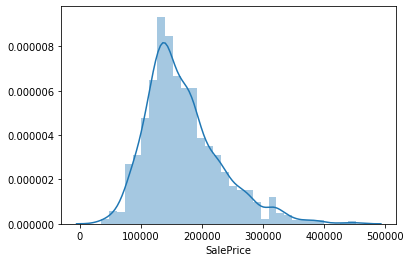

In [54]:
#Target varible now stored in y and removed from other features
# Lets check if the target variable is normally distributed
sns.distplot(y)

SalePrice is Positively skewed, hence we need to transform it first to reduce the skewness.
<br>
Most common transformations for positively skewed data are square-root, log and box-cox. Lets try them all and see which reduces the skewness most

In [55]:
#Current skewness
y.skew()

1.0152241399994646

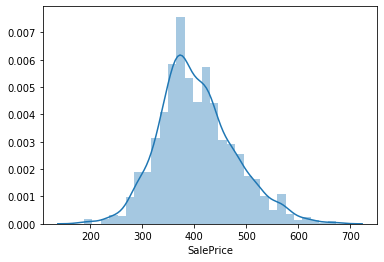

In [56]:
# Square root transformation
sqrt_y = y**(0.5)
sns.distplot(sqrt_y)

In [57]:
round(sqrt_y.skew(),2)

0.45

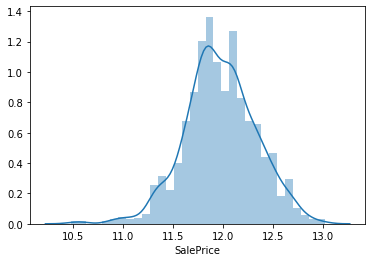

In [58]:
# Log transformation
log_y = np.log(y)
sns.distplot(log_y)

In [59]:
round(log_y.skew(),2)

-0.17

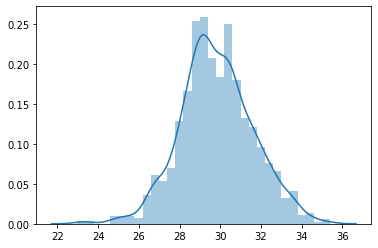

In [60]:
# Box-Cox transformation
from scipy.stats import boxcox
box_y,lmbda = boxcox(y,lmbda=None)

sns.distplot(box_y)

In [61]:
box_y = pd.Series(box_y)
round(box_y.skew(),2)

0.01

Box-Cox transformation has done great work by transforming the data of skewness 1 to 0.01 <br>
Log transformation has even further reduced the skewness to -0.17, but the positively skewed data has become negatively skewed, which means the data might be distorted. Hence lets go with Box-Cox transformation

In [62]:
# BOX_COX transformed y
y=box_y

#### Feature scaling

In [63]:
from sklearn.preprocessing import scale

num_vars = X.select_dtypes(include=['int64','float64','int32']).columns

X[num_vars] = pd.DataFrame(scale(X[num_vars]),columns=num_vars)

X

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MonthSold_August,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
0,-0.175307,-0.239853,0.055216,-0.247463,0.682495,0.289086,0.027576,0.204689,0.796935,-0.525759,0.881395,1.204893,-0.223810,0.647172,0.134125,-0.336581,1.196770,0.741193,-0.265036,-0.283899,-0.948149,-0.401971,0.906651,0.0,-0.792493,1.286768,-0.111399,0.643935,1.165216,-0.240931,0.902031,1.262532,0.217054,-0.213793,0.839688,1.130303,0.230021,-0.909629,-0.942055,0.386652,0.402174,0.471780,0.277505,0.277117,0.295277,-0.771702,0.370984,-0.371784,-0.116294,-0.266828,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0.611004,0.085176,0.055216,-0.247463,0.682495,0.289086,0.027576,0.204689,0.021220,2.173455,-0.615892,-0.662762,-0.223810,0.647172,0.134125,2.530346,0.722245,1.418187,-0.265036,-0.283899,-0.631163,0.719856,0.906651,0.0,0.504772,-0.800288,-0.111399,-0.409641,-0.793180,3.930985,0.902031,-0.734454,0.217054,-0.213793,-0.736674,-0.227505,0.230021,0.736963,0.737057,0.386652,0.402174,0.032733,0.277505,0.277117,0.295277,1.989508,-0.737605,-0.371784,-0.116294,-0.266828,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.018045,0.551523,0.055216,-0.247463,-1.103119,0.289086,0.027576,0.204689,0.796935,-0.525759,0.621662,1.204893,-0.223810,0.647172,0.134125,-0.336581,1.196770,0.193625,-0.265036,-0.283899,-0.276329,-0.225131,0.906651,0.0,-0.587998,1.316095,-0.111399,0.822667,1.165216,-0.240931,0.902031,1.262532,0.217054,-0.213793,0.839688,-0.227505,0.230021,0.736963,0.737057,0.386652,0.402174,0.771130,0.277505,0.277117,0.295277,-0.771702,0.025686,-0.371784,-0.116294,-0.266828,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.437411,0.071044,0.055216,-0.247463,-1.103119,0.289086,0.027576,0.204689,0.796935,-0.525759,-0.615892,-0.662762,-0.223810,-0.506864,1.899209,-0.336581,0.722245,-0.478390,-0.265036,-0.283899,-0.025579,-0.678283,-0.134495,0.0,-0.456994,1.047270,-0.111399,0.660397,1.165216,-0.240931,-0.988212,-0.734454,0.217054,-0.213793,0.839688,0.451399,0.230021,0.736963,1.296761,-0.756794,1.776877,0.940761,0.277505,0.277117,0.295277,-0.771702,-0.101529,4.109206,-0.116294,-0.266828,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.820687,1.402252,0.055216,-0.247463,-1.103119,0.289086,0.027576,0.204689,1.572650,-0.525759,2.057835,1.204893,-0.223810,0.647172,0.134125,1.096883,1.196770,0.614257,-0.265036,-0.283899,-0.143857,0.396571,0.906651,0.0,0.130929,1.773096,-0.111399,1.791580,1.165216,-0.240931,0.902031,1.262532,1.486580,-0.213793,0.839688,1.80

In [64]:
X[num_vars].describe()

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,BuiltOrRemodelAge,Garage_Age
count,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1316.0,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03,1.316000e+03
mean,2.743025e-16,-1.172757e-16,1.199205e-15,1.600375e-16,1.935298e-16,-6.392219e-16,9.106138e-16,6.755825e-16,-1.340535e-16,-3.015993e-16,1.778382e-16,2.463413e-16,-3.930704e-16,-2.262628e-16,-2.038010e-16,-2.125115e-16,-1.936985e-16,9.701797e-18,1.633276e-16,5.399261e-17,8.959399e-17,-1.277474e-16,6.674414e-16,0.0,-2.307024e-16,1.172652e-17,3.949053e-16,1.935298e-16,-1.987603e-16,-1.917159e-16,2.089683e-16,4.386899e-18,1.837436e-16,2.687398e-16,-4.294100e-16,1.684738e-16,1.418150e-16,1.771632e-16,2.109086e-16,-8.588199e-17,7.812056e-17,-3.020212e-17,5.298025e-17,1.951327e-16,2.827019e-16,8.706308e-17,-1.212303e-16,1.989290e-16,7.392137e-16,-1.476360e-17,-2.723463e-16,-1.075634e-17,7.858456e-17,-2.943968e-16,6.681585e-17,3.385084e-17
std,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,0.0,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00,1.000380e+00
min,-2.481820e+00,-2.260688e+00,-1.811077e+01,-2.474630e-01,-4.674347e+00,-5.069177e+00,-3.626293e+01,-8.346762e+00,-3.857354e+00,-4.124711e+00,-6.158918e-01,-2.530417e+00,-5.942914e+00,-3.968972e+00,-5.161127e+00,-3.203508e+00,-1.650382e+00,-1.016003e+00,-1.408603e+00,-2.838994e-01,-1.302983e+00,-2.767203e+00,-3.257932e+00,0.0,-2.460406e+00,-8.002879e-01,-1.113985e-01,-2.592049e+00,-7.931802e-01,-2.409314e-01,-2.878455e+00,-7.344537e-01,-3.591523e+00,-4.679688e+00,-2.313036e+00,-2.943121e+00,-9.084078e+00,-9.096295e-01,-9.420553e-01,-1.900240e+00,-2.347232e+00,-2.262284e+00,-3.795320e+00,-3.790015e+00,-3.669874e+00,-7.717021e-01,-7.376047e-01,-3.717843e-01,-1.162938e-01,-2.668280e-01,-3.894629e-02,-3.488962e-02,-4.730856e-01,-8.550290e-02,-1.130510e+00,-3.133395e-01
25%,-4.374105e-01,-5.672142e-01,5.521576e-02,-2.474630e-01,-1.103119e+00,2.890856e-01,2.757637e-02,2.046890e-01,-7.544946e-01,-5.257588e-01,-6.158918e-01,-6.627621e-01,-2.238099e-01,-5.068639e-01,1.341249e-01,-3.365807e-01,-1.175857e+00,-1.016003e+00,-2.650364e-01,-2.838994e-01,-7.920214e-01,-6.119683e-01,-1.175640e+00,0.0,-7.669315e-01,-8.002879e-01,-1.113985e-01,-7.653405e-01,-7.931802e-01,-2.409314e-01,-9.882120

In [65]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

### 4. Model Building and Evaluation

In [66]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds,return_train_score=True, verbose = 1)          
ridge_model.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [67]:
# display the mean scores

ridge_result = pd.DataFrame(ridge_model.cv_results_)
ridge_result = ridge_result[ridge_result['param_alpha']<=100]
ridge_result[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
19,8,-0.309726,-0.376498,1
20,9,-0.311404,-0.376548,2
18,7,-0.307928,-0.376669,3
21,10,-0.312957,-0.376717,4
17,6,-0.305968,-0.376991,5
16,5,-0.303767,-0.377556,6
15,4,-0.301339,-0.378475,7
22,20,-0.324252,-0.379100,8
14,3,-0.298495,-0.380061,9
13,2,-0.295233,-0.382835,10


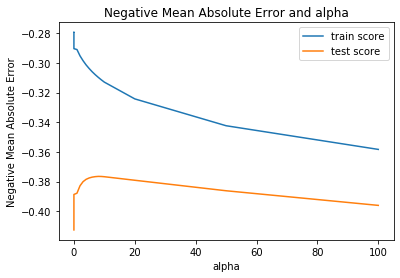

In [68]:
# plotting mean test and train scoes with alpha 

ridge_result['param_alpha'] = ridge_result['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_result['param_alpha'], ridge_result['mean_train_score'])
plt.plot(ridge_result['param_alpha'], ridge_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [69]:
# get the best estimator for lambda

ridge_model.best_estimator_

Ridge(alpha=8.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [70]:
# check the coefficient values with lambda = 8

ridge = Ridge(alpha=8)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.92179182e-02,  1.26355320e-01, -9.46036058e-30,  2.02260757e-02,
        4.40649447e-03, -9.61311496e-03,  2.73937566e-02,  7.82213091e-03,
        3.09655501e-01,  1.42530528e-01,  2.66274619e-02,  3.64302474e-02,
       -3.56633043e-02,  3.95577543e-03,  1.64807546e-02,  3.20450560e-02,
        8.02011780e-02,  1.32924452e-01, -3.30861780e-02,  4.54937403e-02,
        6.52369478e-03,  1.73986692e-01,  5.55022472e-02,  0.00000000e+00,
        1.49714380e-01,  1.66805886e-01, -1.62342516e-02,  2.69100457e-01,
        5.93870092e-02, -1.48720828e-03,  9.34878116e-02,  8.23557277e-02,
       -4.88742278e-02, -5.62699853e-02,  1.00376258e-01,  5.43167417e-02,
        8.51117002e-02,  2.67817897e-02,  3.81858373e-02,  5.80191360e-02,
        3.91272511e-02,  1.35411704e-01,  8.47213568e-02,  7.39442536e-02,
        1.76779734e-02,  4.58300041e-02,  2.17595920e-02,  5.80716410e-03,
       -4.00683979e-04,  5.94127782e-02,  1.00690482e-02,  1.43760223e-02,
        1.78296067e-03,  

In [71]:
from sklearn.metrics import r2_score
y_train_pred = ridge.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9341736542169727

In [72]:
y_test_pred = ridge.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8953487219963434

In [73]:
# Check the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

0.4071128137985722

In [76]:
# Put the Features and coefficient in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df = ridge_df.sort_values(by=['Coefficient'], ascending=False)
ridge_df.head(10)

,Features,Coefficient
83,Neighborhood_Crawfor,0.3614
138,Exterior1st_BrkFace,0.3237
99,Neighborhood_StoneBr,0.3206
8,OverallQual,0.3097
203,SaleCondition_Partial,0.3093
202,SaleCondition_Normal,0.2722
27,GrLivArea,0.2691
103,Condition1_Norm,0.2550
170,Foundation_Slab,0.2328
196,SaleType_New,0.2194


The  top features as per Ridge Regression are:<br>
    1. Neighborhood_Crawfor
    2. Exterior1st_BrkFace
    3. Neighborhood_StoneBr
    4. OverallQual
    5. SaleCondition_Partial
    6. SaleCondition_Normal
    7. GrLivArea
    8. Condition1_Norm
    9. Foundation_Slab
    10. SaleType_New

In [77]:
# What happens if we double the alpha for ridge
ridge2 = Ridge(alpha=16)

ridge2.fit(X_train, y_train)
ridge2_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge2.coef_.round(4)})
ridge2_df.reset_index(drop=True, inplace=True)
ridge2_df = ridge2_df.sort_values(by=['Coefficient'], ascending=False)
ridge2_df.head(10)

,Features,Coefficient
8,OverallQual,0.3140
83,Neighborhood_Crawfor,0.2901
27,GrLivArea,0.2660
138,Exterior1st_BrkFace,0.2584
203,SaleCondition_Partial,0.2499
202,SaleCondition_Normal,0.2382
103,Condition1_Norm,0.2221
99,Neighborhood_StoneBr,0.2204
196,SaleType_New,0.2007
21,TotalBsmtSF,0.1698


#### Lasso Regression

In [78]:
#Supress warning
import warnings
warnings.filterwarnings('ignore')

#Lassp
lasso = Lasso()

# list of alphas
params = {'alpha': [0.00005, 0.0001, 0.0002, 0.0004, 0.001, 0.008, 0.01]}


# cross validation
lasso_model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    3.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [5e-05, 0.0001, 0.0002, 0.0004, 0.001, 0.008,
                                   0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [80]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.001,-0.302136,-0.377167,1
3,0.0004,-0.291556,-0.386464,2
2,0.0002,-0.286442,-0.393348,3
5,0.008,-0.356911,-0.395006,4
1,0.0001,-0.283153,-0.398995,5
6,0.01,-0.364640,-0.400810,6
0,5e-05,-0.281253,-0.403420,7


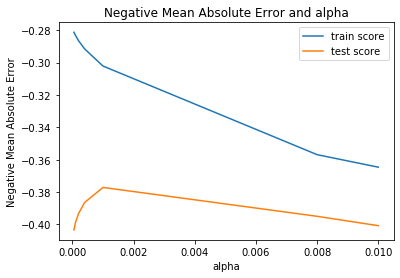

In [81]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [83]:
# get the best estimator for lambda

lasso_model.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
# check the coefficient values with lambda = 0.0001

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 2.79446002e-02,  1.27303273e-01, -0.00000000e+00,  2.54567249e-02,
        7.30910723e-03, -8.27097204e-05,  2.44345282e-02,  5.36020247e-03,
        3.07214484e-01,  1.40738043e-01,  2.41542973e-02,  3.47038289e-02,
       -3.30406161e-02,  1.79779045e-03,  1.52030464e-02,  3.66648105e-02,
        8.25911291e-02,  1.17895681e-01, -2.53800941e-02,  3.38897965e-02,
       -0.00000000e+00,  1.91713391e-01,  5.13442061e-02,  0.00000000e+00,
        3.31935510e-03,  0.00000000e+00, -3.82168656e-02,  4.57606648e-01,
        6.04847750e-02, -1.17132792e-03,  8.38280432e-02,  7.95312049e-02,
       -4.43758393e-02, -5.61684753e-02,  9.57658259e-02,  4.62059581e-02,
        7.66586918e-02,  2.28114963e-02,  3.32593972e-02,  6.11919592e-02,
        2.83349809e-02,  1.47519776e-01,  8.40574853e-02,  6.79893878e-02,
        1.69843593e-02,  4.96399943e-02,  2.32343003e-02,  2.72577986e-03,
       -6.84525614e-04,  5.99340115e-02,  0.00000000e+00,  2.06515500e-02,
        0.00000000e+00,  

In [85]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.42108552077182043

In [86]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotFrontage,0.0279
1,LotArea,0.1273
2,Alley,0.0255
3,LotShape,0.0073
4,LandContour,-0.0001
...,...,...
125,MonthSold_June,0.0231
126,MonthSold_March,-0.1538
127,MonthSold_May,0.0177
128,MonthSold_November,-0.0524


In [87]:
#Top 10 features are
lasso_df = lasso_df.sort_values(by=['Coefficient'], ascending=False)
lasso_df.head(10)

,Features,Coefficient
119,SaleCondition_Partial,0.5812
78,Neighborhood_StoneBr,0.5319
64,Neighborhood_Crawfor,0.4910
23,GrLivArea,0.4576
91,Exterior1st_BrkFace,0.4018
104,Foundation_Slab,0.3941
114,SaleType_ConLD,0.3373
106,Heating_GasA,0.3292
7,OverallQual,0.3072
113,SaleType_CWD,0.3067


#### RFE

In [89]:
# Do an RFE to minimise the features to 15
from sklearn.linear_model import LinearRegression

X_train_l = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_l, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_l, y_train)

In [91]:
# Method to get the coefficient values

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_l.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
0,Neighborhood_StoneBr,True,1,0.531890
1,Neighborhood_Crawfor,True,1,0.490971
2,GrLivArea,True,1,0.457607
3,Heating_GasA,True,1,0.329250
4,OverallQual,True,1,0.307214
5,MSZoning_FV,True,1,0.289408
6,Neighborhood_NridgHt,True,1,0.243340
7,MSZoning_RL,True,1,0.144828
8,Neighborhood_Veenker,True,1,0.133904
9,Heating_Wall,True,1,0.081140


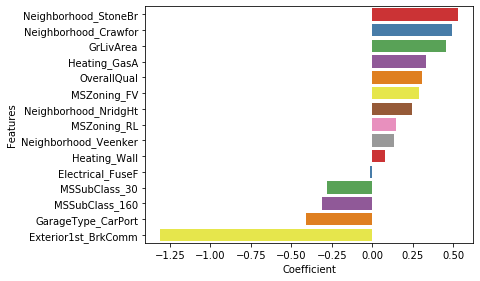

In [92]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top variables based on the Lasso Regression model that are significant in predicting the price 
of a house.  

In [95]:
#double the alpha and check

lasso2 = Lasso(alpha = 0.002)
lasso2.fit(X_train, y_train)
lasso2_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso2.coef_.round(4)})
lasso2_df.reset_index(drop=True, inplace=True)
lasso2_df = lasso2_df[lasso2_df['Coefficient'] != 0.00]
lasso2_df = lasso2_df.sort_values(by=['Coefficient'], ascending=False)
lasso2_df.head(10)

,Features,Coefficient
203,SaleCondition_Partial,0.5407
27,GrLivArea,0.4625
83,Neighborhood_Crawfor,0.4442
99,Neighborhood_StoneBr,0.4184
138,Exterior1st_BrkFace,0.3913
8,OverallQual,0.3228
202,SaleCondition_Normal,0.2880
170,Foundation_Slab,0.2631
103,Condition1_Norm,0.2564
173,Heating_GasA,0.2346


In [96]:
len(lasso2_df.index)

109

## Conclusion :

- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 8
    - Lasso - 0.001
    
- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge - 0.4076
    - Lasso - 0.4201


- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.
  
- Hence based on Lasso, the factors that generally affect the price are GarageType, MS Zoning, Sale Type, Neighborhood, Overall Quality, MB Subclass, Electrical, Heating and Exterior material.
    
Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the 
price of a house.